# <u>Test Exercice 1 - Simple Regression<u>

__<u>Jorge Pineño Pérez<u>__ / Module 2 - Simple Regression

This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression.
In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates assumptions $A3$ and $A4$, which state that all error terms $\epsilon_i$ are drawn from one and the same distribution with mean zero and fixed variance $\sigma^2$. The dataset contains twenty weekly observations on sales and advertising of a department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the analysis.

In [4]:
# package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# dataset import
sales = pd.read_excel('TestExer-1-sales-round1.xls')
sales.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


In [6]:
# change column names
sales = sales.rename(columns={'Observation': 'Obs', 'Advertising': 'Ad', 'Sales': 'S'})
sales

,Obs,Ad,S
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23
5,6,9,25
6,7,15,27
7,8,6,25
8,9,11,26
9,10,16,27


__(a)__ Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you
expect to find if you would fit a regression line to these data?

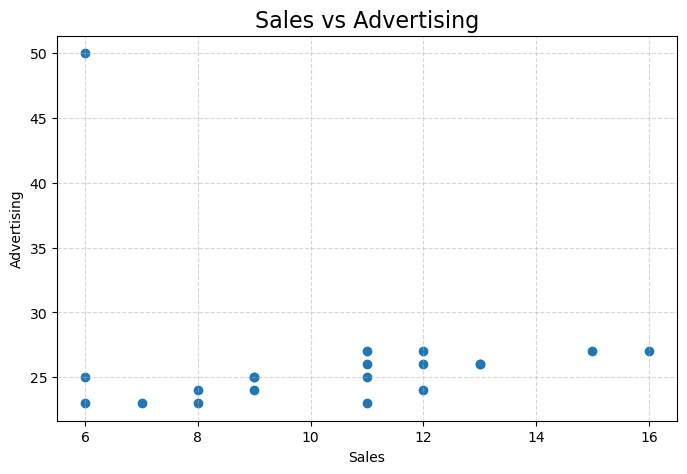

In [8]:
# make a scatter diagram with sales on the y-axis, and advertising on the x-axis
plt.figure(figsize=(8, 5))
plt.scatter(sales['Ad'], sales['S'])
plt.title('Sales vs Advertising', fontsize=16)
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.grid(True, linestyle='--', alpha=0.5)

If we were to fit a regression to these data, the presence of the value $(Sales=6, Advertising=50)$ would probably cause the intercept to be higher than expected, so the line in the graph would be more horizontal than it would be without that value, or even have a negative slope.

__(b)__ Estimate the coefficients $a$ and $b$ in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of $b$. Is $b$ significantly different from 0?

We can find the coefficients $a$ and $b$ by following the least squares criterion, by which we solve $\frac{\partial S}{\partial a} = 0$ and $\frac{\partial S}{\partial b} = 0$, and get these expressions:

$$b = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})}$$
$$a = \bar{y} - b\bar{x}$$

In [16]:
# get b first, by following the expression above
num = []
den = []

for i in range(len(sales)):
    num1i = sales.loc[i, 'Ad']-sales['Ad'].mean()
    num2i = sales.loc[i, 'S']-sales['S'].mean()
    deni = (sales.loc[i, 'Ad']-sales['Ad'].mean())**2
    num.append(num1i*num2i)
    den.append(deni)

b = np.sum(num)/np.sum(den)
b

-0.32457496136012354

In [18]:
# get a, by following the expression above
a = sales['S'].mean() - b*sales['Ad'].mean()
a

29.626893353941266

We have found that $a = 29.6269$, and $b = -0.3246$, so we can express the model as:

$$y_i = 29.6269 - 0.3246x_i + \epsilon_i$$

With this, we can now compute $s$ (the standard error), and the t-value of $b$, by using the following expressions:

$$e = y_i - a - bx_i$$
$$s^2 = \frac{1}{n-2} \sum_{i=1}^n e_i^2$$
$$s = \sqrt{s^2}$$
$$t_b = \frac{b}{s_b}, \space where \space s_b = \sqrt{\frac{s^2}{\sum_{i=1}^n (x_i-\bar{x})^2}}$$

In [21]:
# get the sum of e squared with the expression above
e2 = []

for i in range(len(sales)):
    ei2 = (sales.loc[i, 'S']-a-b*sales.loc[i, 'Ad'])**2
    e2.append(ei2)

sume2 = np.sum(e2)
sume2

613.1598145285935

In [67]:
# get sb with the expression above
s2 = (1/(len(sales)-2))*sume2
sb = np.sqrt((s2)/(np.sum((sales['Ad'] - sales['Ad'].mean())**2)))
sb

0.45891097580291074

In [71]:
# get the t-value of b with the expression above
tb = b/sb
tb

-0.7072721692747643

From these results, we can say that $b$ is not significantly different from 0, as $|t_b| < 2$, which means that, as a rule of thumb, the p-value will be larger than 0.05, and therefore the null hypothesis cannot be rejected.

__(c)__ Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?

In [75]:
# get residuals e from the expression shown in (b), and without summing their squares
e = []

for i in range(len(sales)):
    ei = (sales.loc[i, 'S']-a-b*sales.loc[i, 'Ad'])
    e.append(ei)

e

[-1.731993817619784,
 1.268006182380216,
 -1.7057187017001545,
 0.9434312210200924,
 -4.679443585780525,
 -1.7057187017001545,
 2.241731066460587,
 -2.6794435857805254,
 -0.05656877897990764,
 2.56630602782071,
 -1.0565687789799076,
 22.320556414219475,
 0.5925811437403397,
 -3.0565687789799076,
 0.5925811437403397,
 -4.354868624420401,
 -4.030293663060278,
 -3.030293663060278,
 0.268006182380216,
 -2.7057187017001545]

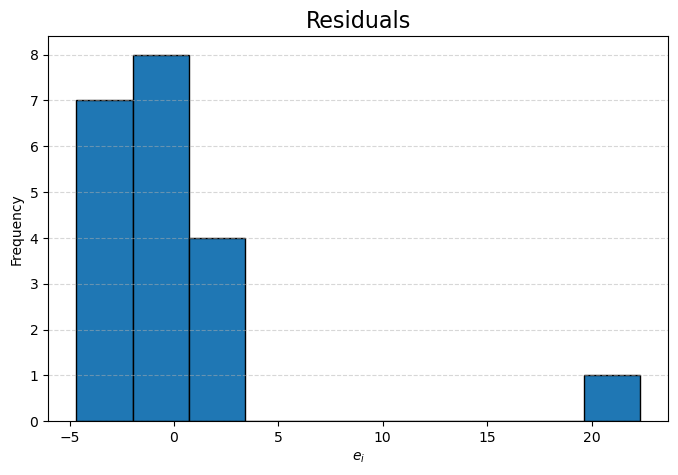

In [77]:
# make a histogram with the values of the residuals
plt.figure(figsize=(8, 5))
plt.hist(e, edgecolor='black')
plt.title('Residuals', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('$e_i$')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

As a conclusion from the histogram, we can say that one of the values is probably an outlier in the data, i.e. an unusual value which stands out from the rest because of a special characteristic. 

__(d)__ Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual corresponds to the week with opening hours during the evening, how would you proceed to get a more satisfactory regression model?

Knowing that the unusually large residual value corresponds to the week in which the store opened in the evenings as well as in the mornings, as usual, a way to get a more satisfactory model would be to count the sales made only during the hours in which the store would normally be opened, and therefore have a unique set of hours across all observations.

__(e)__ Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients $a$ and $b$ in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also
compute the standard error and t-value of $b$. Is $b$ significantly different from 0?

In [83]:
# delete the row 11 (observation 12) from the dataframe
sales2 = sales.drop(11)
sales2.reset_index(drop=True, inplace=True)
sales2

,Obs,Ad,S
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23
5,6,9,25
6,7,15,27
7,8,6,25
8,9,11,26
9,10,16,27


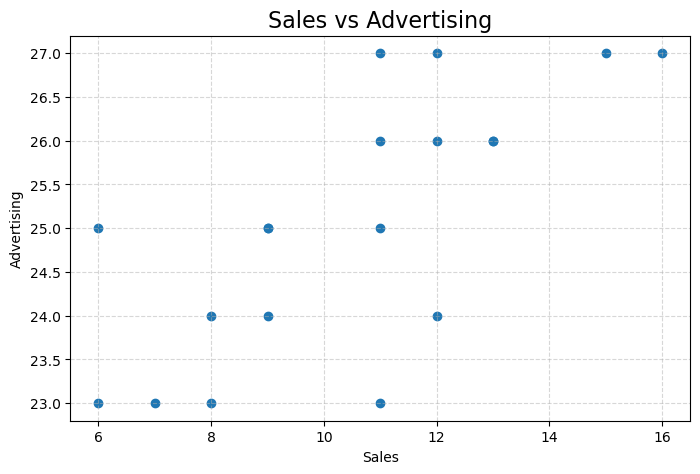

In [85]:
# plot after having removed the odd value
plt.figure(figsize=(8, 5))
plt.scatter(sales2['Ad'], sales2['S'])
plt.title('Sales vs Advertising', fontsize=16)
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.grid(True, linestyle='--', alpha=0.5)

In [87]:
# get b, by following the expression shown in (b)
num = []
den = []

for i in range(len(sales2)):
    num1i = sales2.loc[i, 'Ad']-sales2['Ad'].mean()
    num2i = sales2.loc[i, 'S']-sales2['S'].mean()
    deni = (sales2.loc[i, 'Ad']-sales2['Ad'].mean())**2
    num.append(num1i*num2i)
    den.append(deni)

b = np.sum(num)/np.sum(den)
b

0.3750000000000001

In [89]:
# get a, by following the expression shown in (a)
a = sales2['S'].mean() - b*sales2['Ad'].mean()
a

21.125

After We have found that $a = 21.125$, and $b = 0.375$, so we can express the model as:

$$y_i = 21.125 + 0.375x_i + \epsilon_i$$

We can now study whether $b$ is significantly different from 0 with this new dataframe

In [92]:
# get the sum of e squared with the expression shown in (b)
e2 = []

for i in range(len(sales2)):
    ei2 = (sales2.loc[i, 'S']-a-b*sales2.loc[i, 'Ad'])**2
    e2.append(ei2)

sume2 = np.sum(e2)
sume2

18.875

In [94]:
# get sb with the expression above
s2 = (1/(len(sales2)-2))*sume2
sb = np.sqrt((s2)/(np.sum((sales2['Ad'] - sales2['Ad'].mean())**2)))
sb

0.0881964241412493

In [96]:
# get the t-value of b with the expression shown in (b)
tb = b/sb
tb

4.251873062329897

After removing the outlier, $b$ becomes significantly different from 0. The t-value is 4.25, which is well above the rule of thumb threshold of 2, indicating strong evidence against the null hypothesis.

__(f)__ Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned from these results.

In part (b), the regression coefficient was not significantly different from 0 due to the influence of an outlier, which distorted the results and increased the error variance. In part (e), after removing the outlier, the coefficient became statistically significant, revealing a positive relationship between advertising and sales. This shows how a single outlier can mask true effects in a regression analysis and highlights the importance of checking for unusual data points.